# Dask-ML using random generated dask arrays

The code snipets are from the [page](https://examples.dask.org/machine-learning.html#Training-on-Large-Datasets).

In [ ]:
#! pip install "tornado>=5" 
#! pip install "dask[complete]==2021.06.0"
! pip install "cloudpickle>=1.5.0"
! pip install dask distributed --upgrade
! pip install dask_ml dask-ml
#! python -m pip install dask distributed --upgrade

  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
     |████████████████████████████████| 972kB 5.0MB/s 
     |████████████████████████████████| 716kB 16.0MB/s 
     |████████████████████████████████| 122kB 23.1MB/s 
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
     |████████████████████████████████| 143kB 6.6MB/s 
     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Need to restart the runtime.

In [ ]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(10000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

In [ ]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

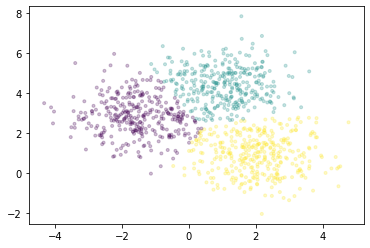

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

# Vaex.ml example on Iris Dataset

The code snipets are from the [page](https://vaex.io/docs/example_ml_iris.html) from vaex.io site.

In [ ]:
!pip install vaex
!pip install ipython==7.0.0

     |████████████████████████████████| 768kB 6.4MB/s 
     |████████████████████████████████| 348kB 13.6MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.0.0 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


You need to restart the runtime here to use newly installed packages.

In [ ]:
import vaex
vaex.multithreading.thread_count_default = 2
import vaex.ml

import numpy as np
import pylab as plt

In [ ]:
df = vaex.ml.datasets.load_iris()
df

#,sepal_length,sepal_width,petal_length,petal_width,class_
0,5.9,3.0,4.2,1.5,1
1,6.1,3.0,4.6,1.4,1
2,6.6,2.9,4.6,1.3,1
3,6.7,3.3,5.7,2.1,2
4,5.5,4.2,1.4,0.2,0
...,...,...,...,...,...
145,5.2,3.4,1.4,0.2,0
146,5.1,3.8,1.6,0.2,0
147,5.8,2.6,4.0,1.2,1
148,5.7,3.8,1.7,0.3,0


/usr/local/lib/python3.7/dist-packages/vaex/viz/mpl.py:205: UserWarning: `scatter` is deprecated and it will be removed in version 5.x. Please use `df.viz.scatter` instead.
  warnings.warn('`scatter` is deprecated and it will be removed in version 5.x. Please use `df.viz.scatter` instead.')


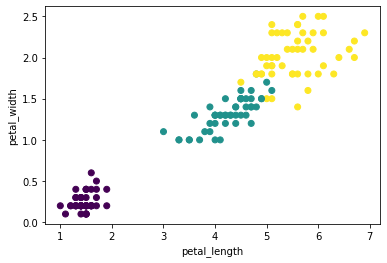

In [ ]:
df.scatter(df.petal_length, df.petal_width, c_expr=df.class_);

In [ ]:
df.shuffle().export("shuffled.hdf5")
df = vaex.open("shuffled.hdf5")
df_train, df_test = df.ml.train_test_split(test_size=0.2)

/usr/local/lib/python3.7/dist-packages/vaex/ml/__init__.py:31: UserWarning: Make sure the DataFrame is shuffled
  warnings.warn('Make sure the DataFrame is shuffled')


In [ ]:
features = df_train.column_names[:4]
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
pca = vaex.ml.PCA(features=features, n_components=4)
df_train = pca.fit_transform(df_train)
df_train

#,sepal_length,sepal_width,petal_length,petal_width,class_,PCA_0,PCA_1,PCA_2,PCA_3
0,5.2,3.5,1.5,0.2,0,2.568713586840249,0.3670395451364764,0.09456798683369383,-0.01133770793405331
1,6.9,3.2,5.7,2.3,2,-2.420623123419454,0.4031245768756558,-0.22770390438319071,0.165743884194422
2,5.5,2.3,4.0,1.3,1,-0.18239831039579563,-0.8178024786242812,0.16643771705285243,0.0998713271981017
3,6.9,3.1,5.1,2.3,2,-1.9160356139446175,0.4325085874684942,-0.13162002972812348,0.490237203439567
4,6.3,2.5,4.9,1.5,1,-1.2956107717031755,-0.31572872481754216,0.34042210315951926,0.008168573043919186
...,...,...,...,...,...,...,...,...,...
115,6.1,2.6,5.6,1.4,2,-1.7776801115848906,-0.4864741712865185,0.17994472858548538,-0.5043762116392749
116,5.4,3.9,1.7,0.4,0,2.2897304867856394,0.744865747885167,-0.14822862113867102,-0.032915417672087055
117,6.3,3.4,5.6,2.4,2,-2.1358439516567094,0.1696647484921654,-0.7404483068642085,0.01914746682462054
118,5.0,3.4,1.5,0.2,0,2.631974087415509,0.16300588277104427,0.03670639017265753,-0.0432815542984476


In [ ]:
import lightgbm
import vaex.ml.sklearn

In [ ]:
# Features on which to train the model
train_features = df_train.get_column_names(regex='PCA_.*')
# The target column
target = 'class_'

In [ ]:
# Instantiate the LightGBM Classifier
booster = lightgbm.sklearn.LGBMClassifier(num_leaves=5,
                                          max_depth=5,
                                          n_estimators=100,
                                          random_state=42)

In [ ]:
# Make it a vaex transformer (for the automagic pipeline and lazy predictions)
model = vaex.ml.sklearn.Predictor(features=train_features,
                                  target=target,
                                  model=booster,
                                  prediction_name='prediction')

In [ ]:
# Train and predict
model.fit(df=df_train)
df_train = model.transform(df=df_train)

df_train

#,sepal_length,sepal_width,petal_length,petal_width,class_,PCA_0,PCA_1,PCA_2,PCA_3,prediction
0,5.2,3.5,1.5,0.2,0,2.568713586840249,0.3670395451364764,0.09456798683369383,-0.01133770793405331,0
1,6.9,3.2,5.7,2.3,2,-2.420623123419454,0.4031245768756558,-0.22770390438319071,0.165743884194422,2
2,5.5,2.3,4.0,1.3,1,-0.18239831039579563,-0.8178024786242812,0.16643771705285243,0.0998713271981017,1
3,6.9,3.1,5.1,2.3,2,-1.9160356139446175,0.4325085874684942,-0.13162002972812348,0.490237203439567,2
4,6.3,2.5,4.9,1.5,1,-1.2956107717031755,-0.31572872481754216,0.34042210315951926,0.008168573043919186,1
...,...,...,...,...,...,...,...,...,...,...
115,6.1,2.6,5.6,1.4,2,-1.7776801115848906,-0.4864741712865185,0.17994472858548538,-0.5043762116392749,2
116,5.4,3.9,1.7,0.4,0,2.2897304867856394,0.744865747885167,-0.14822862113867102,-0.032915417672087055,0
117,6.3,3.4,5.6,2.4,2,-2.1358439516567094,0.1696647484921654,-0.7404483068642085,0.01914746682462054,2
118,5.0,3.4,1.5,0.2,0,2.631974087415509,0.16300588277104427,0.03670639017265753,-0.0432815542984476,0


In [ ]:
state = df_train.state_get()
df_test.state_set(state)

df_test

#,sepal_length,sepal_width,petal_length,petal_width,class_,PCA_0,PCA_1,PCA_2,PCA_3,prediction
0,6.5,3.2,5.1,2.0,2,-1.6549265727485285,0.2639260629354394,-0.24770462180944067,0.10303393833319496,2
1,6.0,3.4,4.5,1.6,1,-0.7991732570110774,0.2128673308456351,-0.38317948275824965,-0.13513791250699264,1
2,4.8,3.0,1.4,0.1,0,2.7895320529667376,-0.23825239608654208,0.21559677476728145,0.003253501725940744,0
3,7.9,3.8,6.4,2.0,2,-3.219657776249763,1.3955809454634271,0.13159312638074994,-0.2672452885456579,2
4,6.3,2.7,4.9,1.8,2,-1.384986029203057,-0.1874523706802681,0.052707238788897326,0.15909039762960742,2
...,...,...,...,...,...,...,...,...,...,...
25,6.3,3.3,6.0,2.5,2,-2.5231266756612154,0.021212320786325525,-0.765973588630523,-0.06642372217402892,2
26,6.3,2.3,4.4,1.3,1,-0.8140305827227013,-0.3645009136038568,0.6026993661814943,0.1722186644313512,1
27,5.8,2.7,4.1,1.0,1,-0.2328273104650135,-0.32619934055514116,0.27526490259329983,-0.20662486246816167,1
28,4.4,3.2,1.3,0.2,0,3.0020081676450845,-0.34123079297161624,-0.1816707784267264,-0.0769203197210877,0


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true=df_test.class_.values, y_pred=df_test.prediction.values)
acc *= 100.
print(f'Test set accuracy: {acc}%')

Test set accuracy: 96.66666666666667%


/usr/local/lib/python3.7/dist-packages/vaex/viz/mpl.py:205: UserWarning: `scatter` is deprecated and it will be removed in version 5.x. Please use `df.viz.scatter` instead.
  warnings.warn('`scatter` is deprecated and it will be removed in version 5.x. Please use `df.viz.scatter` instead.')


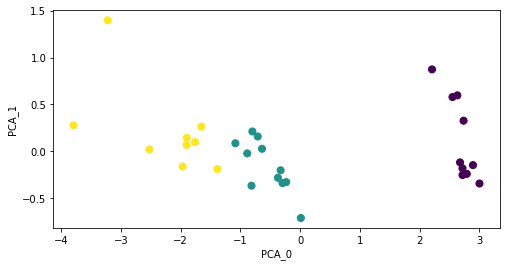

In [ ]:
plt.figure(figsize=(8, 4))
df_test.scatter(df_test.PCA_0, df_test.PCA_1, c_expr=df_test.class_, s=50)
plt.show()